In [1]:
import pandas as pd
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.model_selection import train_test_split
from tensorflow.keras import backend as K

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, Dropout, Reshape, Lambda

2024-11-02 14:41:18.282638: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
file = h5py.File('xy.h5', 'r')

x = file['x'][:]
y = file['y'][:]

x.shape, y.shape

((50000, 3675), (50000,))

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((40000, 3675), (40000,), (10000, 3675), (10000,))

In [4]:
sequence_size = 3675
embedding_size = 64
vocabulary_size = 4096

input = Input(shape=(sequence_size,))
embedding = Embedding(input_dim=vocabulary_size, output_dim=embedding_size)(input)
flatten = Flatten()(embedding)
output = Dense(1, activation='sigmoid')(flatten)

model = Model(inputs=input, outputs=output)

In [5]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3675)]            0         
                                                                 
 embedding (Embedding)       (None, 3675, 64)          262144    
                                                                 
 flatten (Flatten)           (None, 235200)            0         
                                                                 
 dense (Dense)               (None, 1)                 235201    
                                                                 
Total params: 497345 (1.90 MB)
Trainable params: 497345 (1.90 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
optimizer = Adam(learning_rate=.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy','mse'])
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=32, batch_size=8192)

Epoch 1/32
5/5 [==============================] - 31s 5s/step - loss: 0.7029 - accuracy: 0.4980 - mse: 0.2548 - val_loss: 0.7027 - val_accuracy: 0.5000 - val_mse: 0.2547
Epoch 2/32
5/5 [==============================] - 46s 10s/step - loss: 0.6965 - accuracy: 0.5026 - mse: 0.2517 - val_loss: 0.6984 - val_accuracy: 0.5000 - val_mse: 0.2526
Epoch 3/32
5/5 [==============================] - 28s 6s/step - loss: 0.6942 - accuracy: 0.5057 - mse: 0.2505 - val_loss: 0.6960 - val_accuracy: 0.5000 - val_mse: 0.2514
Epoch 4/32
5/5 [==============================] - 25s 5s/step - loss: 0.6929 - accuracy: 0.5150 - mse: 0.2499 - val_loss: 0.6940 - val_accuracy: 0.5006 - val_mse: 0.2504
Epoch 5/32
5/5 [==============================] - 29s 6s/step - loss: 0.6922 - accuracy: 0.5160 - mse: 0.2495 - val_loss: 0.6922 - val_accuracy: 0.5039 - val_mse: 0.2496
Epoch 6/32
5/5 [==============================] - 27s 5s/step - loss: 0.6911 - accuracy: 0.5122 - mse: 0.2490 - val_loss: 0.6915 - val_accuracy: 0.52

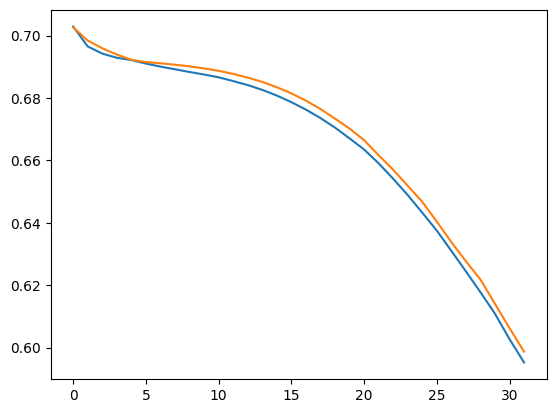

In [7]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
 
plt.show()

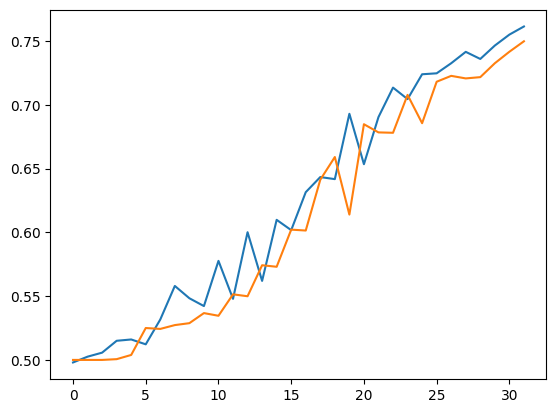

In [8]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.show()